In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, make_scorer
import numpy as np

# load data
data = fetch_california_housing()
X = data.data
y = data.target

# model
model = LinearRegression()

# define MSE scorer (cross_val_score uses "score", so we use negative MSE)
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# 5-fold cross-validation
scores = cross_val_score(model, X, y, cv=5, scoring=mse_scorer)

print("MSE for each fold:", -scores)  # negate because scoring returns negative
print("Average MSE:", -np.mean(scores))


MSE for each fold: [0.48485857 0.62249739 0.64621047 0.5431996  0.49468484]
Average MSE: 0.5582901717686806


In [2]:
# Train model on full data (after CV)
model.fit(X, y)


LinearRegression()

In [3]:
# Predict on the same dataset (just for demonstration)
y_pred_full = model.predict(X)


In [4]:
overall_mse = mean_squared_error(y, y_pred_full)
print("Overall MSE on full dataset:", overall_mse)


Overall MSE on full dataset: 0.5243209861846072


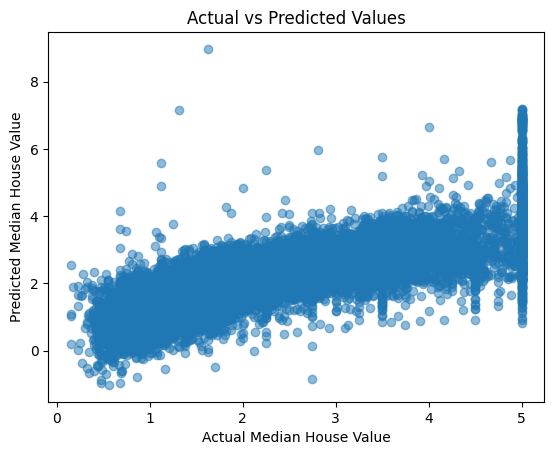

In [5]:
import matplotlib.pyplot as plt

plt.scatter(y, y_pred_full, alpha=0.5)
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Actual vs Predicted Values")
plt.show()


In [6]:
print("Average CV MSE:", -np.mean(scores))
print("Full dataset MSE:", overall_mse)


Average CV MSE: 0.5582901717686806
Full dataset MSE: 0.5243209861846072
